# Australian Athletes Dataset

## The purpose

The purpose of this project is to visualize the Australian Atheletes dataset, based on the 'sport' column create a new feature called 'sport_type' and run a hypothesis test for the hemoglobin concentration of the endurance and non-endurance atletes, and finally visualize the results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math
from scipy import stats

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

## 1. About the data
##### reference - https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html

Usage data(ais) Format A data frame with 202 observations on the following 13 variables.

rcc red blood cell count, in

wcc white blood cell count, in per liter

hc hematocrit, percent

hg hemaglobin concentration, in g per decaliter

ferr plasma ferritins, ng

bmi Body mass index, kg

ssf sum of skin folds

pcBfat percent Body fat

lbm lean body mass, kg

ht height, cm

wt weight, kg

sex a factor with levels f m

sport a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

In [2]:
ais = pd.read_csv(r"C:\Data\IOD_Data\ais.csv", index_col=0)
ais.head()

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt sex  \
1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   f   
2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   f   
3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   f   
4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   f   
5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   f   

    sport  
1  B_Ball  
2  B_Ball  
3  B_Ball  
4  B_Ball  
5  B_Ball

In [3]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 22.1+ KB


In [4]:
ais.describe()

rcc         wcc          hc          hg        ferr         bmi  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean     4.718614    7.108911   43.091584   14.566337   76.876238   22.955891   
std      0.457976    1.800337    3.662989    1.362451   47.501239    2.863933   
min      3.800000    3.300000   35.900000   11.600000    8.000000   16.750000   
25%      4.372500    5.900000   40.600000   13.500000   41.250000   21.082500   
50%      4.755000    6.850000   43.500000   14.700000   65.500000   22.720000   
75%      5.030000    8.275000   45.575000   15.575000   97.000000   24.465000   
max      6.720000   14.300000   59.700000   19.200000  234.000000   34.420000   

              ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    69.021782   13.507426   64.873713  180.103960   75.007921  
std     32.565333    6.189826   13.070197    9.734494   13.925199  
min     28.000000    5.630000   34.360000  148.900000   37.800000  
25%     43.850000    8.545000   54.667500  174.000000   66.525000  
50%     58.600000   11.650000   63.035000  179.700000   74.400000  
75%     90.350000   18.080000   74.750000  186.175000   84.125000  
max    200.800000   35.520000  106.000000  209.400000  123.200000

## 2. EDA's and quick visualizations

In [5]:
# Checking to see if there is any null values present - apperantly we don't have any null values
ais.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

In [6]:
# Looking at what sports are included into our dataset
ais['sport'].value_counts()

sport
Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: count, dtype: int64

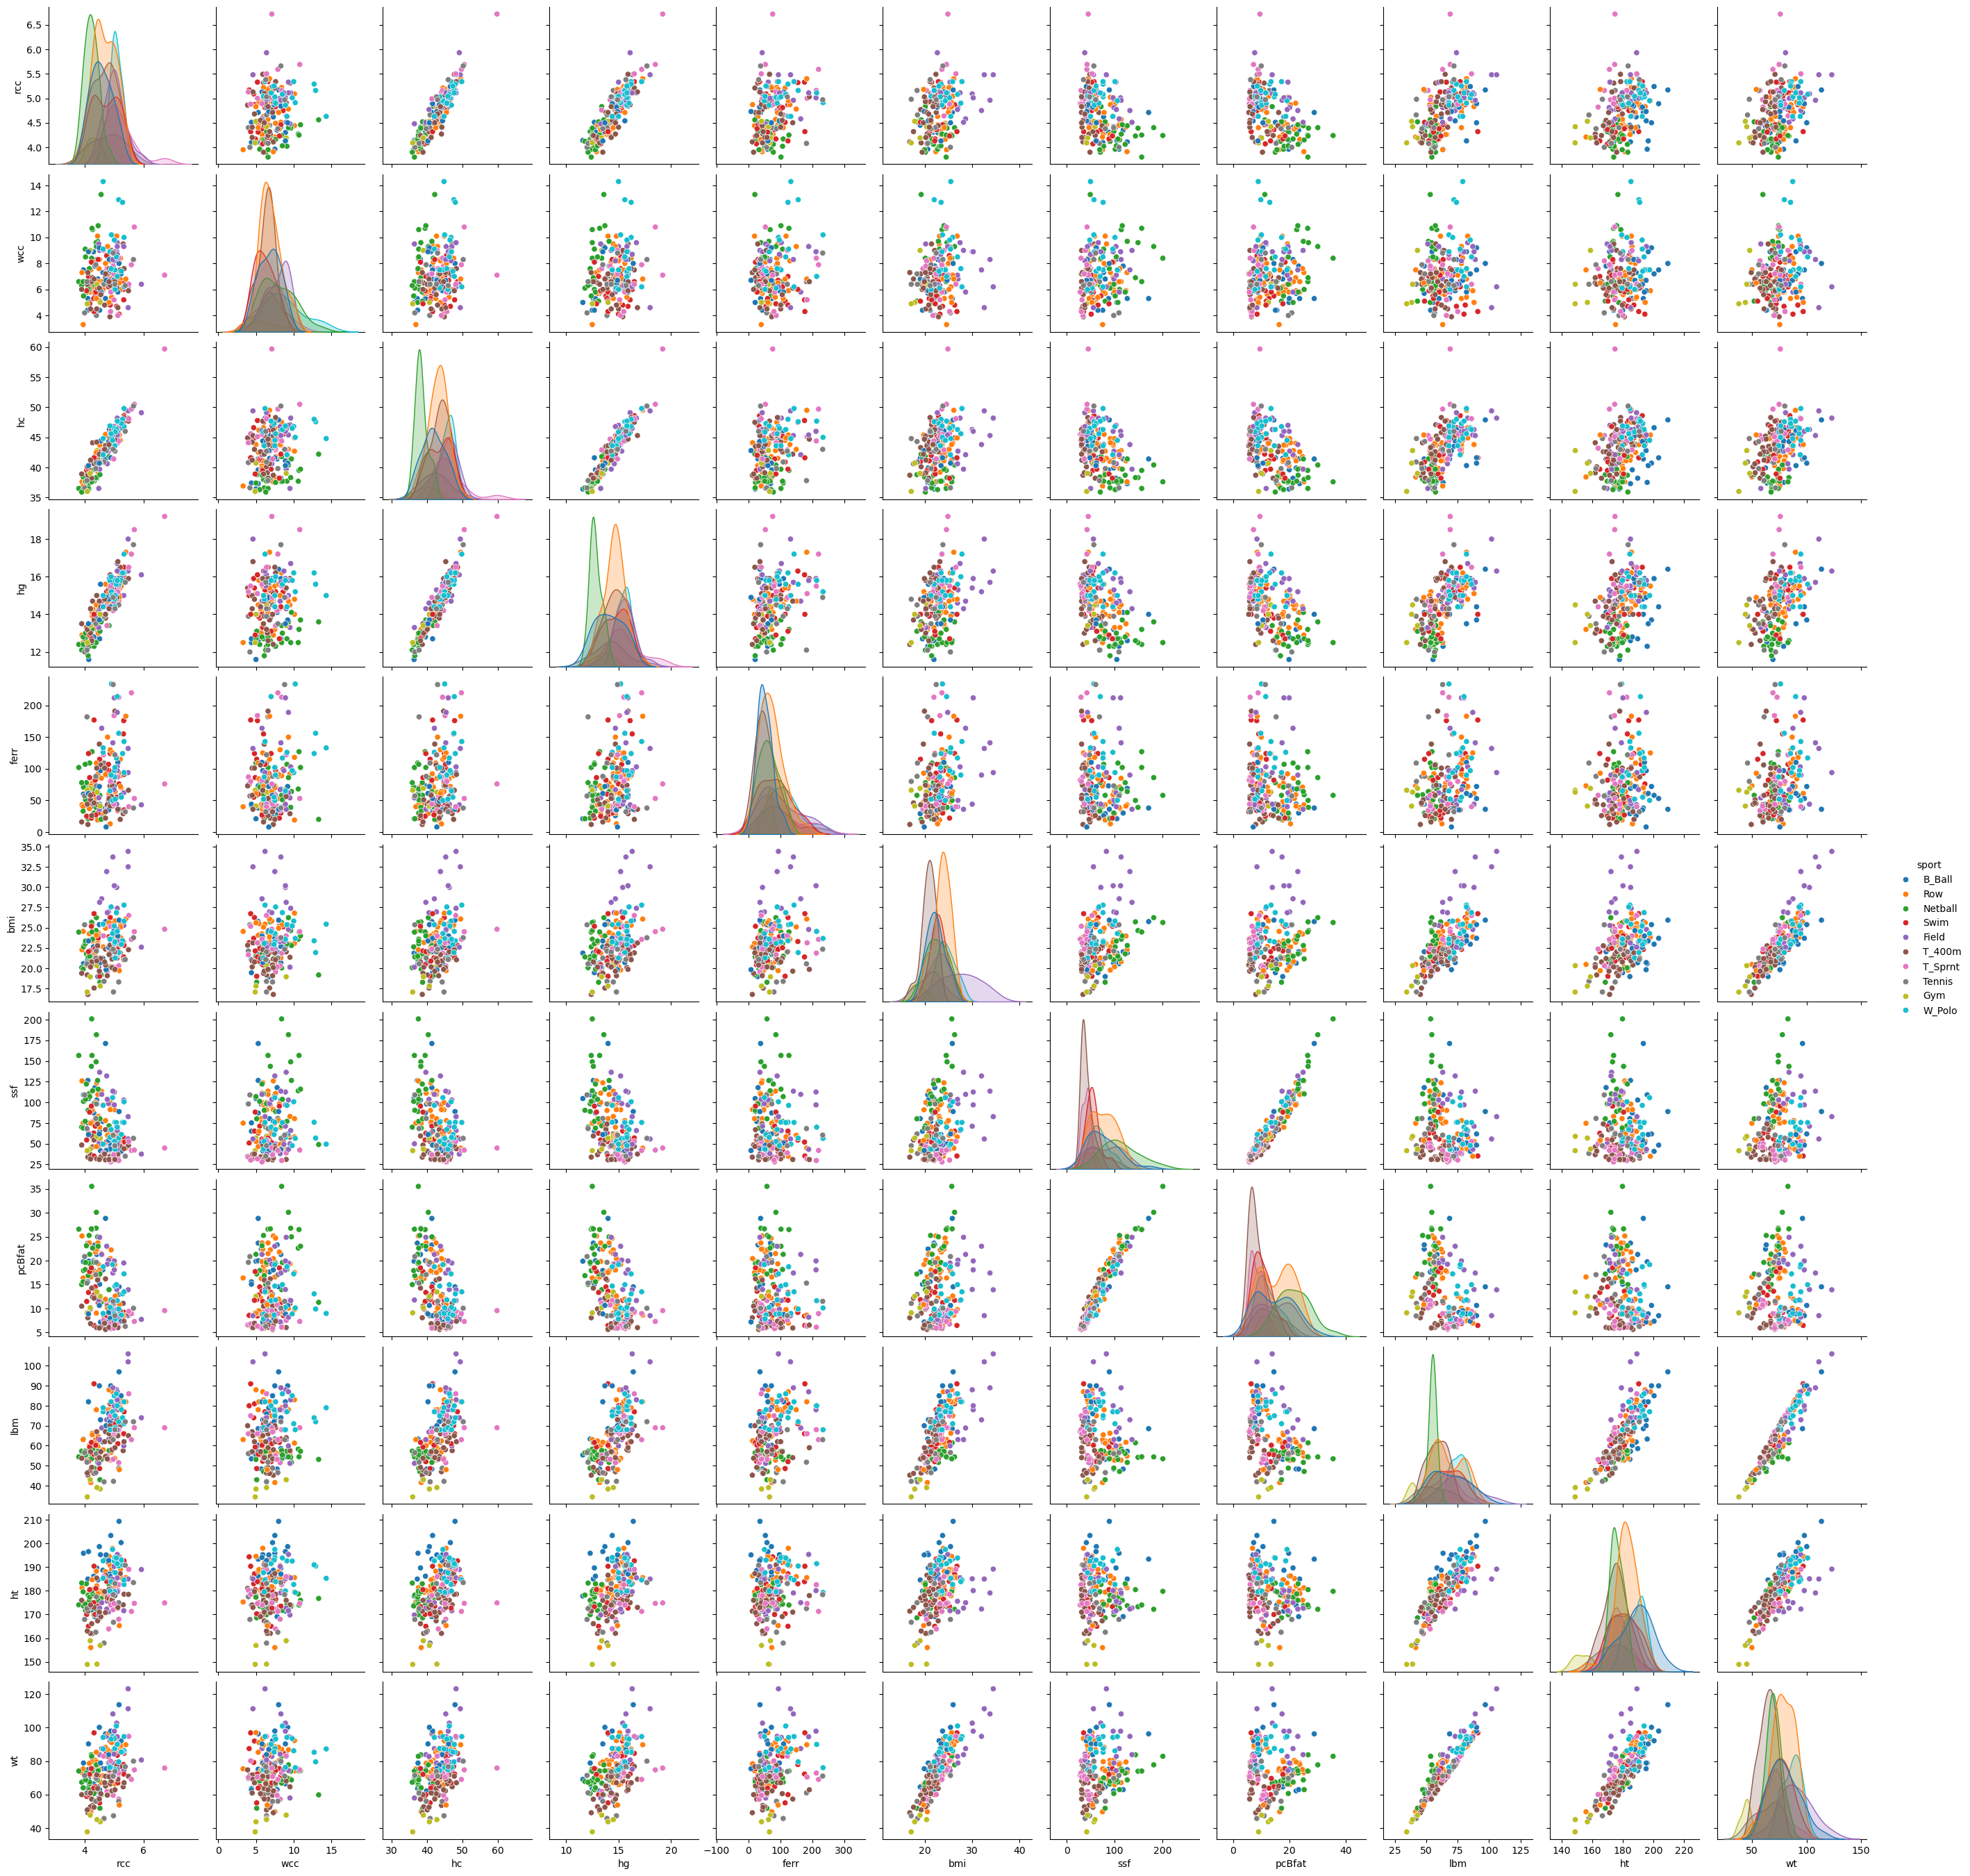

In [7]:
# A quick visualization based on the hue argumetn set to 'sport'
sns.pairplot(data = ais, hue = 'sport')
plt.show()

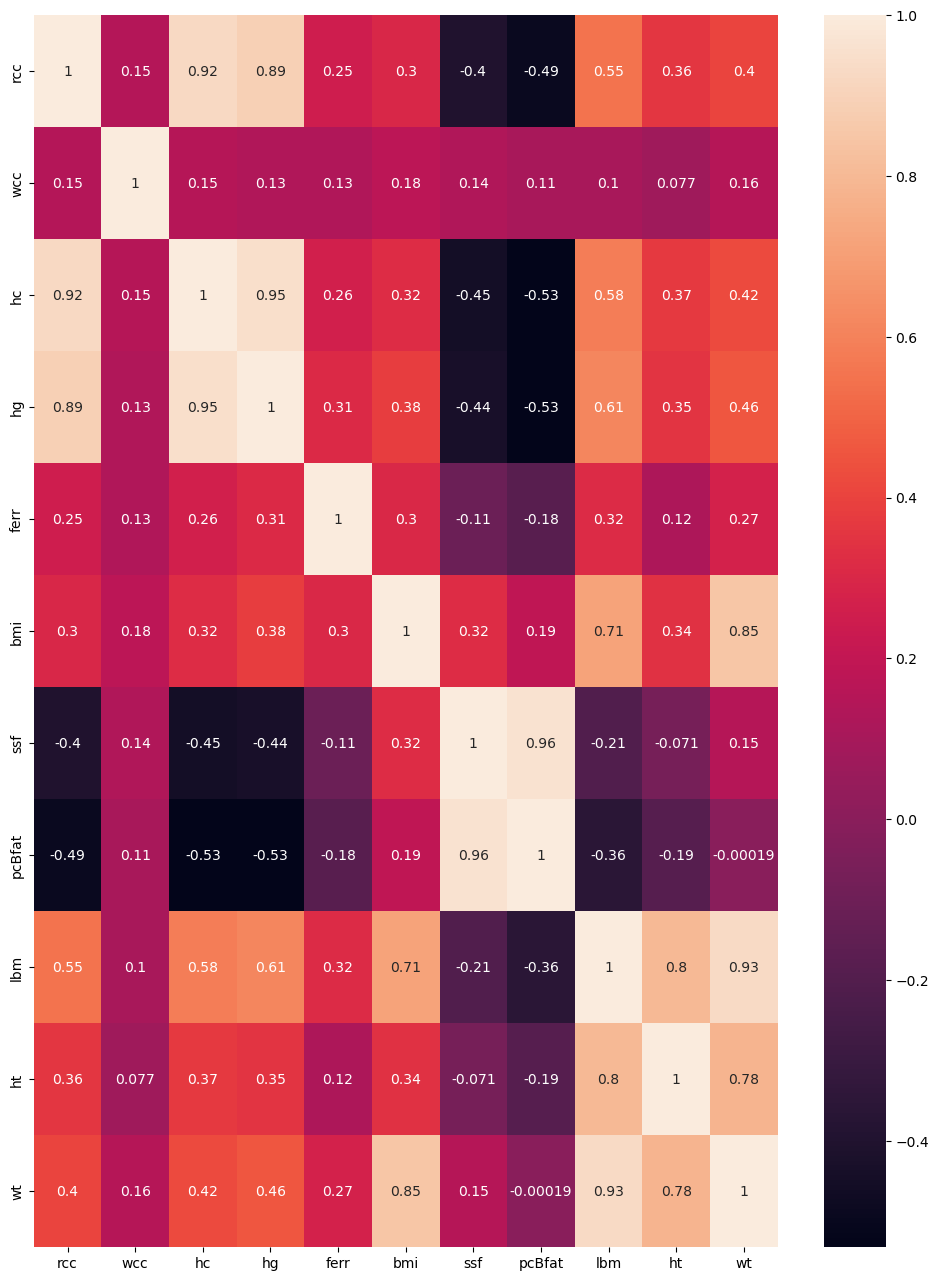

In [8]:
# A quick correlation heatmap 
plt.figure(figsize = (12,16))
sns.heatmap(ais.corr(numeric_only = True), annot = True)
plt.show()

## 3. Adding a new feature based on the 'sport' column

In the context of our dataset, the following sports can be categorized as endurance sports:

Row (Rowing) – Rowing is a classic endurance sport, requiring sustained effort over long distances.
Swim (Swimming) – While it depends on the distance, many swimming events (especially longer distances like 200m or more) are endurance-based.
T_400m (Track, 400m) – The 400m is often considered a middle-distance track event, and though it requires both speed and endurance, it leans toward the endurance side compared to shorter sprints.
Other sports, like W_Polo (Water Polo), may have endurance components due to the constant movement, but they also require significant strength and agility, so they can be considered more hybrid or mixed.

Power/sprint-based sports include T_Sprnt (Track, Sprints), B_Ball (Basketball), Netball, Tennis, Field, and Gym (Gymnastics).



In [9]:
# Now I'll add a new column based on the above information

# The sports that are considered endurance
endurance_sports = ['Row', 'Swim', 'T_400m']

# Creating a new column 'sport_type' based on whether the sport is in the endurance list
ais['sport_type'] = ais['sport'].apply(lambda x: 1 if x in endurance_sports else 0)

# Checking the new column
ais[['sport', 'sport_type']]


sport  sport_type
1     B_Ball           0
2     B_Ball           0
3     B_Ball           0
4     B_Ball           0
5     B_Ball           0
6     B_Ball           0
7     B_Ball           0
8     B_Ball           0
9     B_Ball           0
10    B_Ball           0
11    B_Ball           0
12    B_Ball           0
13    B_Ball           0
14       Row           1
15       Row           1
16       Row           1
17       Row           1
18       Row           1
19       Row           1
20       Row           1
21       Row           1
22       Row           1
23       Row           1
24       Row           1
25       Row           1
26       Row           1
27       Row           1
28       Row           1
29       Row           1
30       Row           1
31       Row           1
32       Row           1
33       Row           1
34       Row           1
35       Row           1
36   Netball           0
37   Netball           0
38   Netball           0
39   Netball           0
40   Netball           0
41   Netball           0
42   Netball           0
43   Netball           0
44   Netball           0
45   Netball           0
46   Netball           0
47   Netball           0
48   Netball           0
49   Netball           0
50   Netball           0
51   Netball           0
52   Netball           0
53   Netball           0
54   Netball           0
55   Netball           0
56   Netball           0
57   Netball           0
58   Netball           0
59      Swim           1
60      Swim           1
61      Swim           1
62      Swim           1
63      Swim           1
64      Swim           1
65      Swim           1
66      Swim           1
67      Swim           1
68     Field           0
69    T_400m           1
70     Field           0
71     Field           0
72     Field           0
73     Field           0
74     Field           0
75     Field           0
76    T_400m           1
77   T_Sprnt           0
78    T_400m           1
79    T_400m           1
80    T_400m           1
81    T_400m           1
82    T_400m           1
83    T_400m           1
84    T_400m           1
85   T_Sprnt           0
86    T_400m           1
87    T_400m           1
88   T_Sprnt           0
89   T_Sprnt           0
90    Tennis           0
91    Tennis           0
92    Tennis           0
93    Tennis           0
94    Tennis           0
95    Tennis           0
96    Tennis           0
97       Gym           0
98       Gym           0
99       Gym           0
100      Gym           0
101     Swim           1
102     Swim           1
103     Swim           1
104     Swim           1
105     Swim           1
106     Swim           1
107     Swim           1
108     Swim           1
109     Swim           1
110     Swim           1
111     Swim           1
112     Swim           1
113     Swim           1
114      Row           1
115      Row           1
116      Row           1
117      Row           1
118      Row           1
119      Row           1
120      Row           1
121      Row           1
122      Row           1
123      Row           1
124      Row           1
125      Row           1
126      Row           1
127      Row           1
128      Row           1
129   B_Ball           0
130   B_Ball           0
131   B_Ball           0
132   B_Ball           0
133   B_Ball           0
134   B_Ball           0
135   B_Ball           0
136   B_Ball           0
137   B_Ball           0
138   B_Ball           0
139   B_Ball           0
140   B_Ball           0
141   T_400m           1
142   T_400m           1
143   T_400m           1
144   T_400m           1
145    Field           0
146    Field           0
147    Field           0
148   T_400m           1
149   T_400m           1
150   T_400m           1
151   T_400m           1
152   T_400m           1
153   T_400m           1
154   T_400m           1
155   T_400m           1
156  T_Sprnt           0
157  T_Sprnt           0
158  T_Sprnt           0
159    Field           0
160    

In [10]:
# Checking the distribution of endurance and non-endurance sports
ais['sport_type'].value_counts()

sport_type
0    114
1     88
Name: count, dtype: int64

In [11]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rcc         202 non-null    float64
 1   wcc         202 non-null    float64
 2   hc          202 non-null    float64
 3   hg          202 non-null    float64
 4   ferr        202 non-null    int64  
 5   bmi         202 non-null    float64
 6   ssf         202 non-null    float64
 7   pcBfat      202 non-null    float64
 8   lbm         202 non-null    float64
 9   ht          202 non-null    float64
 10  wt          202 non-null    float64
 11  sex         202 non-null    object 
 12  sport       202 non-null    object 
 13  sport_type  202 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 23.7+ KB


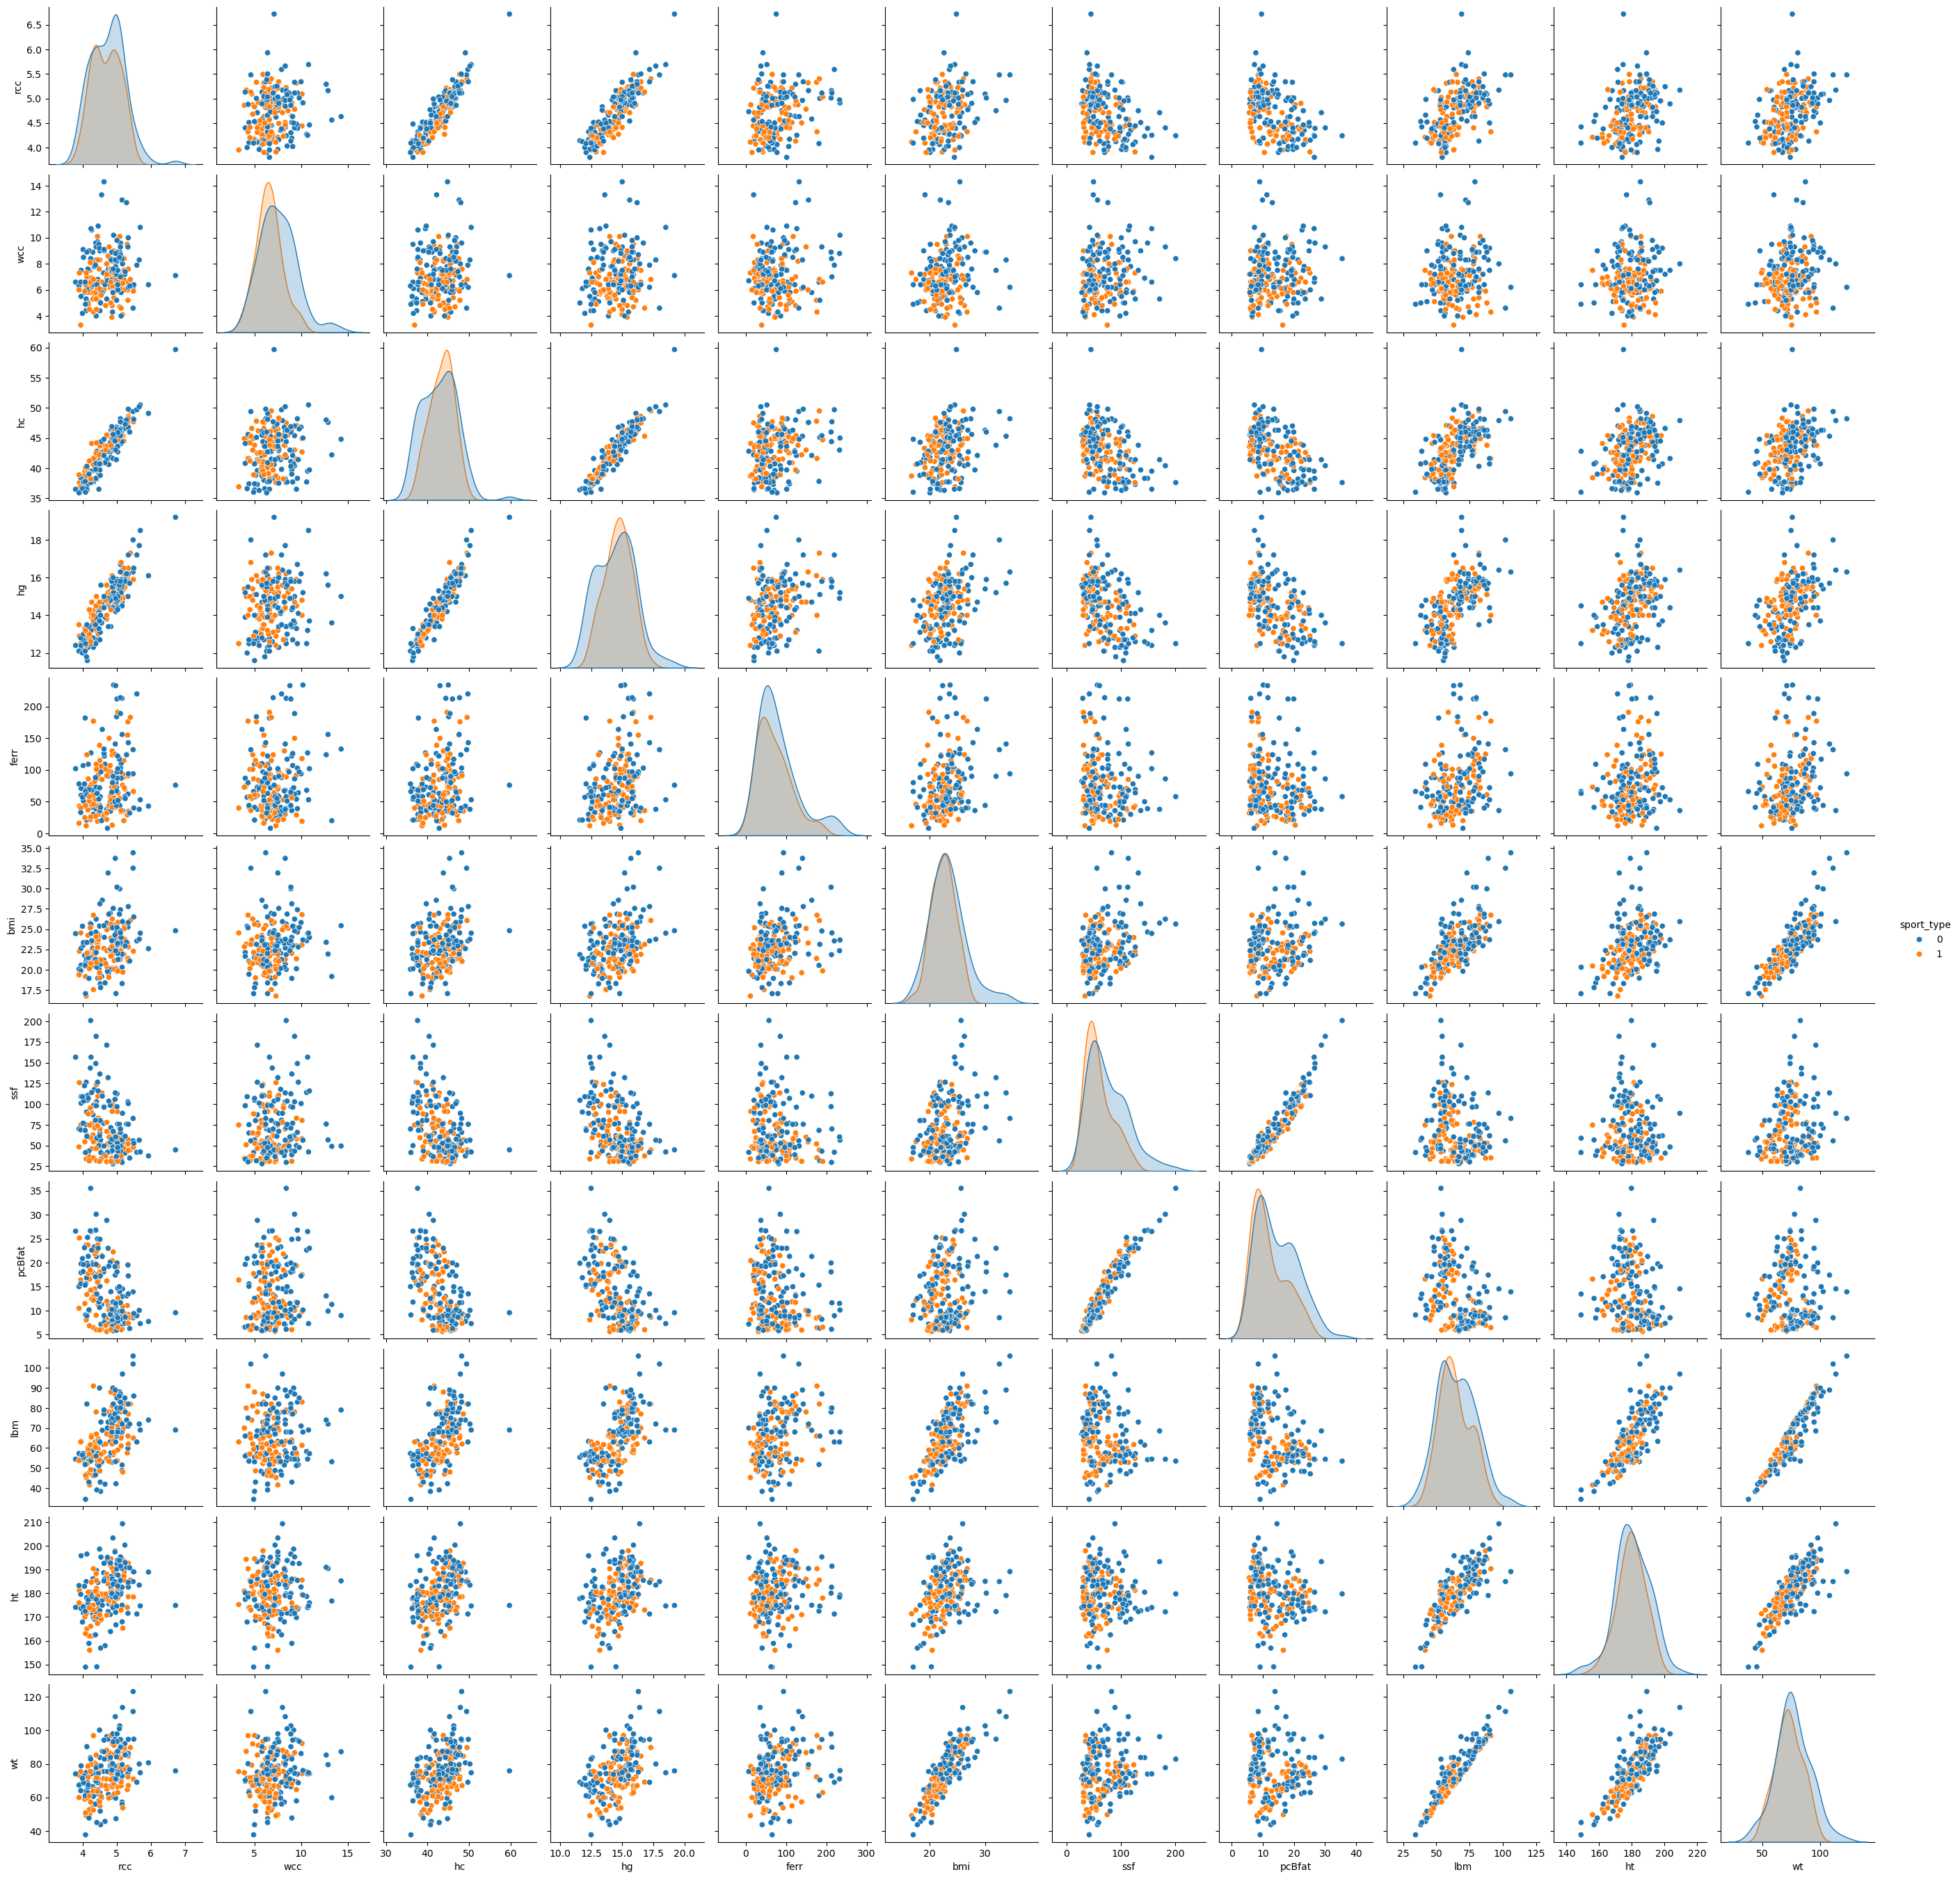

In [12]:
# Now I can create another visualization with the hue argument set to sport type, which is not giving a lot info at first glance, which might make this ideal for a hypothesis testing
sns.pairplot(data = ais, hue = 'sport_type')
plt.show()

In [13]:
ais.describe()

rcc         wcc          hc          hg        ferr         bmi  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean     4.718614    7.108911   43.091584   14.566337   76.876238   22.955891   
std      0.457976    1.800337    3.662989    1.362451   47.501239    2.863933   
min      3.800000    3.300000   35.900000   11.600000    8.000000   16.750000   
25%      4.372500    5.900000   40.600000   13.500000   41.250000   21.082500   
50%      4.755000    6.850000   43.500000   14.700000   65.500000   22.720000   
75%      5.030000    8.275000   45.575000   15.575000   97.000000   24.465000   
max      6.720000   14.300000   59.700000   19.200000  234.000000   34.420000   

              ssf      pcBfat         lbm          ht          wt  sport_type  
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    69.021782   13.507426   64.873713  180.103960   75.007921    0.435644  
std     32.565333    6.189826   13.070197    9.734494   13.925199    0.497073  
min     28.000000    5.630000   34.360000  148.900000   37.800000    0.000000  
25%     43.850000    8.545000   54.667500  174.000000   66.525000    0.000000  
50%     58.600000   11.650000   63.035000  179.700000   74.400000    0.000000  
75%     90.350000   18.080000   74.750000  186.175000   84.125000    1.000000  
max    200.800000   35.520000  106.000000  209.400000  123.200000    1.000000

## 4. Extra visualizations based on the newly created 'sport_type' column and 'hg' column, getting ready for a hypothesis test

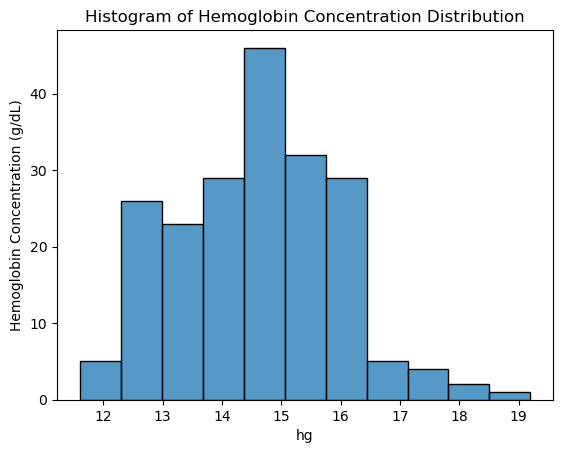

In [14]:
# What is the distribution of the hemoglobin concentration - 'almost' normally distributed
sns.histplot(x = 'hg', data = ais)
plt.title('Histogram of Hemoglobin Concentration Distribution')

plt.ylabel('Hemoglobin Concentration (g/dL)')
plt.show()
plt.show()

In [15]:
# Checking the value counts in the hemoglobin column to see the distribution and to make sure there isn't anything out of ordinary hiding 
ais['hg'].value_counts()

hg
15.9    10
15.0     9
14.7     9
14.8     8
14.0     8
15.8     7
14.4     7
15.2     7
14.3     6
14.9     6
15.6     6
14.5     6
12.7     6
12.5     6
13.9     5
13.5     5
15.5     5
15.4     5
13.3     4
14.1     4
16.2     4
13.2     4
15.7     4
15.1     3
16.1     3
16.5     3
16.3     3
12.3     3
13.4     3
12.6     3
13.7     3
12.4     3
12.8     3
13.0     3
13.8     2
15.3     2
17.2     2
13.1     2
12.1     2
13.6     2
12.9     2
19.2     1
16.8     1
16.7     1
18.5     1
16.0     1
18.0     1
17.3     1
16.4     1
11.6     1
11.8     1
12.0     1
14.2     1
14.6     1
17.7     1
Name: count, dtype: int64

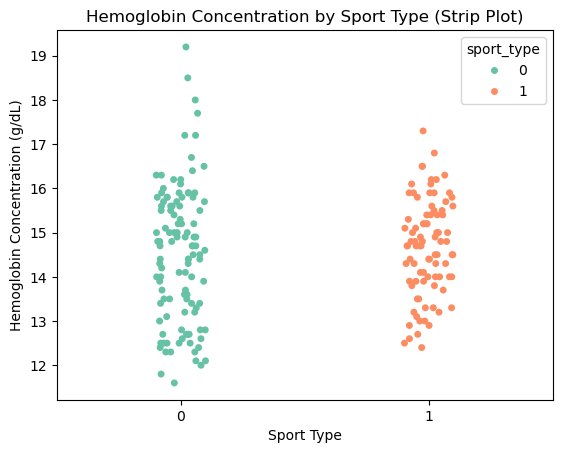

In [16]:
# Visualizing individual points with a stripplot which can be helpful for identifying clusters or patterns of hemoglobin concentrations between endurance and non-endurance sports

sns.stripplot(x='sport_type', y='hg', data=ais, hue='sport_type', palette='Set2', jitter=True)

# Titles and labels
plt.title('Hemoglobin Concentration by Sport Type (Strip Plot)')
plt.xlabel('Sport Type')
plt.ylabel('Hemoglobin Concentration (g/dL)')
plt.show()


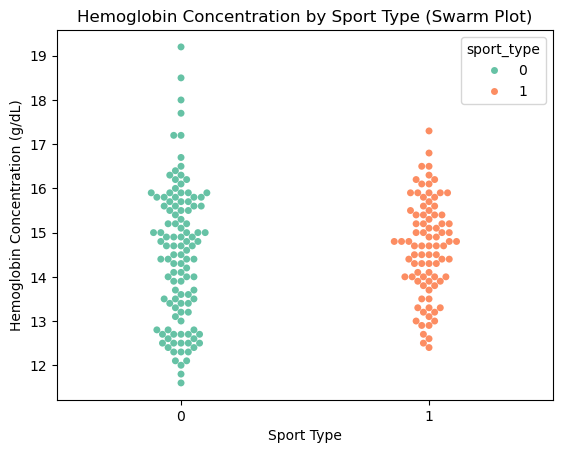

In [17]:
sns.swarmplot(x='sport_type', y='hg', data=ais, hue='sport_type', palette='Set2')

# Add titles and labels
plt.title('Hemoglobin Concentration by Sport Type (Swarm Plot)')
plt.xlabel('Sport Type')
plt.ylabel('Hemoglobin Concentration (g/dL)')
plt.show()


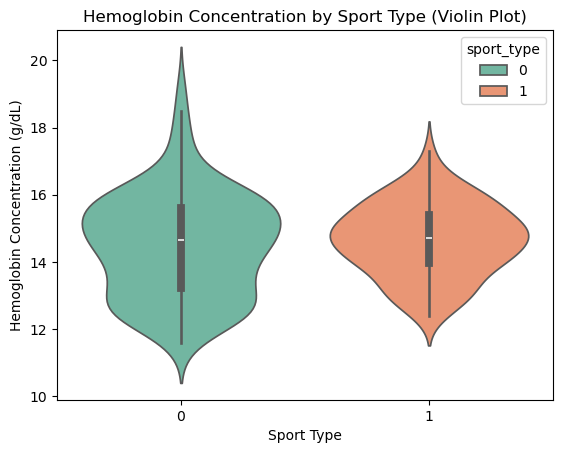

In [18]:
sns.violinplot(x='sport_type', y='hg', hue = 'sport_type', data=ais, palette='Set2')

# Add titles and labels
plt.title('Hemoglobin Concentration by Sport Type (Violin Plot)')
plt.xlabel('Sport Type')
plt.ylabel('Hemoglobin Concentration (g/dL)')
plt.show()


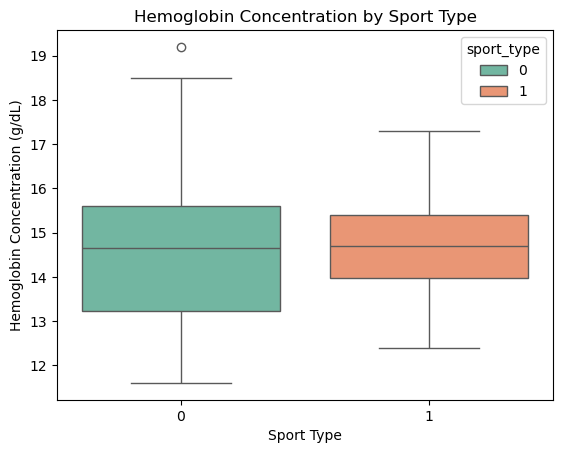

In [19]:
# Create a boxplot
sns.boxplot(x='sport_type', y='hg', hue = 'sport_type', data=ais, palette='Set2')

# Add titles and labels
plt.title('Hemoglobin Concentration by Sport Type')
plt.xlabel('Sport Type')
plt.ylabel('Hemoglobin Concentration (g/dL)')
plt.show()

In [20]:
# Want to conmpare the mean hemoglobin concentration levels for both sport types

print(f'Mean hemoglobin concentration (g/dL) for non-endurance athletes is:', ais[ais['sport_type'] == 0]['hg'].mean())
print(f'Mean hemoglobin concentration (g/dL) for endurance athletes is:', ais[ais['sport_type'] == 1]['hg'].mean())

Mean hemoglobin concentration (g/dL) for non-endurance athletes is: 14.492982456140352
Mean hemoglobin concentration (g/dL) for endurance athletes is: 14.661363636363639


## 5. Defining the hypothesis
    H0: There is no difference in the mean of Hemoglobin Concentrations between the endurance and non-endurance athletes.
    H1: There is a difference in the mean of Hemoglobin Concentrations between the endurance and non-endurance athletes.

In [21]:
alpha = 0.05

In [22]:
N = 50
non_endurance = ais[ais['sport_type'] == 0]['hg'].sample(N, random_state = 42)
endurance = ais[ais['sport_type'] == 1]['hg'].sample(N, random_state = 42)

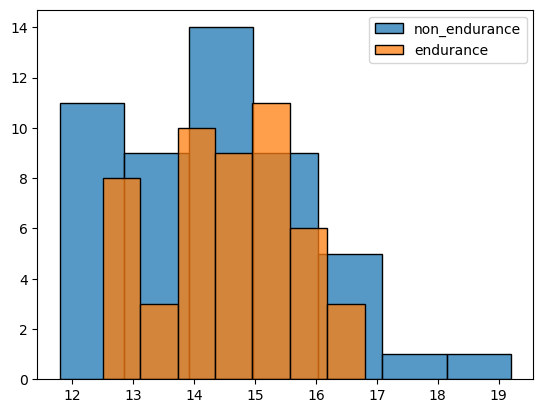

In [23]:
ax = sns.histplot(non_endurance, label='non_endurance', kde=False);
sns.histplot(endurance, ax=ax, label='endurance', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

In [24]:
# Claculating degrees of Freedom
df = 2 * N - 2
df

98

In [25]:
# Calculate variences for both samples
var_non_endurance = non_endurance.var()
print(var_non_endurance)
var_endurance = endurance.var()
print(var_endurance)

2.3355102040816327
1.1411795918367345


In [26]:
# Calculating pooled standard deviation
std = np.sqrt((var_non_endurance + var_endurance) / 2)
print('std dev:', std)

std dev: 1.3184630817581444


In [27]:
# Calculating t-statistic
t = (non_endurance.mean() - endurance.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

t: -0.9025660380366246


In [28]:
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
print("t = " + str(t))
print("p = " + str(2 * p))


t = -0.9025660380366246
p = 0.3689693273560062


## 6. Visualizing the hypothesis decision

In [29]:
# A function to visualize the decision for our hypothesis

def hypothesis_decision(t, p, alpha=0.05):
    """
    Plots the standard normal distribution and highlights the critical regions
    for a two-tailed t-test based on the provided t-statistic and p-value.

    Parameters:
    - t: float
        The t-statistic value from the t-test.
    - p: float
        The p-value from the t-test.
    - alpha: float, optional (default=0.05)
        The significance level for the hypothesis test.
    """
    # Generate data for a standard normal distribution
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x, loc=0, scale=1)

    # Define critical t value for illustration
    t_critical = stats.norm.ppf(1 - alpha / 2)  # Critical value for the given alpha

    # Decision based on p-value
    decision = "Decision: Reject H0" if p < alpha else "Decision: Fail to Reject H0"

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Standard Normal Distribution', color='blue')

    # Highlight critical regions for a two-tailed test in red
    plt.fill_between(x, y, where=(x > t_critical), color='red', alpha=0.3, label='Reject H0 (Critical Region)')
    plt.fill_between(x, y, where=(x < -t_critical), color='red', alpha=0.3)

    # Shade the alpha level in gray
    plt.fill_between(x, y, where=(x > t_critical), color='gray', alpha=0.2, label=f'Alpha = {alpha}')
    plt.fill_between(x, y, where=(x < -t_critical), color='gray', alpha=0.2)

    # Add labels and title
    plt.xlabel('t-statistic')
    plt.ylabel('Probability Density')
    plt.title('Two-Tailed t-Test')
    plt.axvline(x=t_critical, color='black', linestyle='--', label=f't_critical = {t_critical:.2f}')
    plt.axvline(x=-t_critical, color='black', linestyle='--')

    # Add the actual t-statistic line and p-value annotation
    plt.axvline(x=t, color='green', linestyle='--', label=f'actual t = {t:.2f}')
    plt.text(t, 0.1, f'actual t = {t:.2f}\nactual p = {p:.4f}', ha='center', va='bottom', color='red', fontsize=10)

    # Add the decision annotation
    plt.text(0, 0.3, decision, ha='center', va='bottom', color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # Add legend and move it to the top right corner
    plt.legend(loc='upper right')

    # Show the plot
    plt.grid(True)
    plt.show()

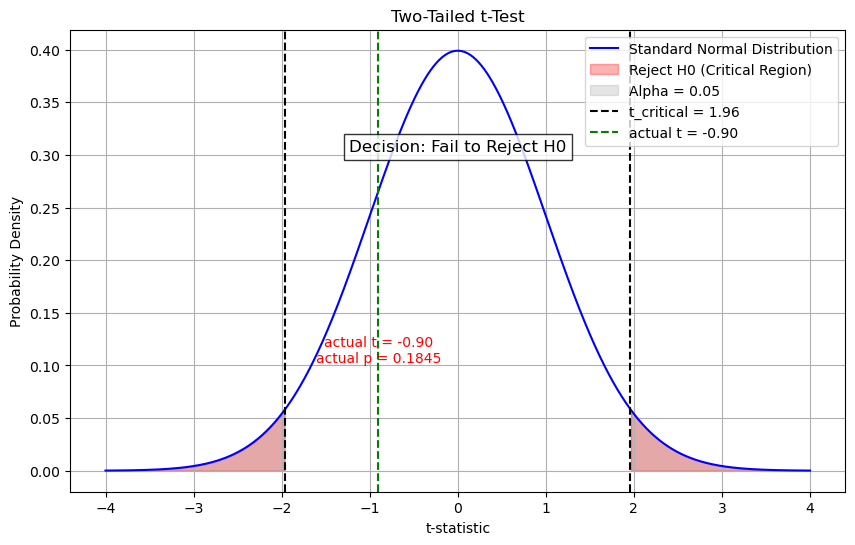

In [30]:
hypothesis_decision(t, p, alpha)